In [1]:
pip install matplotlib ipywidgets

Note: you may need to restart the kernel to use updated packages.


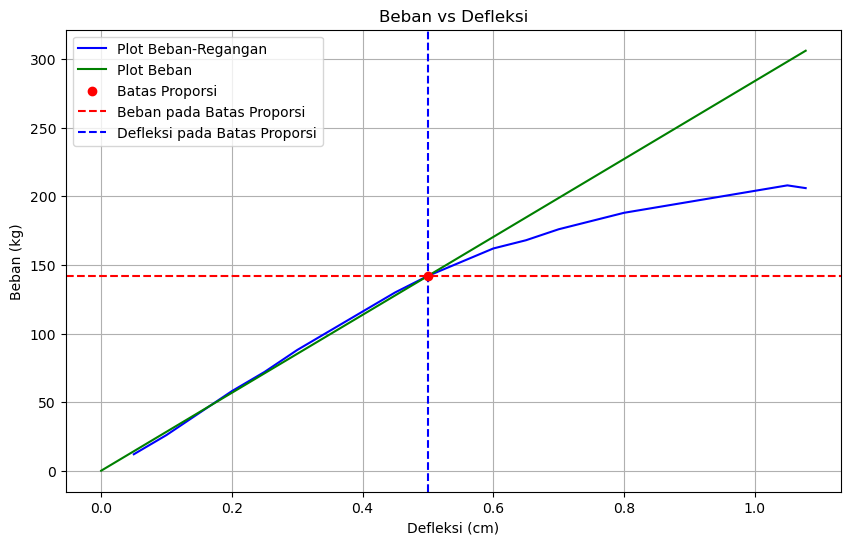

Beban pada Batas Proporsi: 142.00 kg
Defleksi pada Batas Proporsi: 0.50 cm
Beban Maksimum/pada Batas Patah: 208.00 kg
Tegangan pada Batas Proporsi: 679.07 kg/cm²
Modulus of Elasticity (MoE): 85319.13 kg/cm²
Modulus of Rupture (MoR): 994.69 kg/cm²


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Data strain (defleksi/regangan) dan stress (beban)
strain_cm = np.array([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6,
                      0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1, 1.05, 1.078])
stress_kg = np.array([12, 26, 42, 58, 72, 88, 102, 116, 130, 142, 152, 162, 168, 176, 182,
                      188, 192, 196, 200, 204, 208, 206])

# Dimensi sampel
L_cm = 28  # panjang bentangan sampel (cm)
b_cm = 2.03  # lebar sampel (cm)
d_cm = 2.08  # tebal sampel (cm)

# Batas proporsi (dengan asumsi bahwa kemiringannya linear)
def find_proportional_limit(strain, stress):
    # Hitung kemiringan plot beban
    slopes = np.diff(stress) / np.diff(strain)
    # Kemiringan plot beban dikoreksi dengan deviasi
    initial_slope = slopes[0]
    deviation_index = np.argmax(slopes < 0.8 * initial_slope)
    return strain[deviation_index], stress[deviation_index]

# Hitung MoE (Modulus of Elasticity) menggunakan defleksi (Δ), MoR (Modulus of Rupture), dan Tegangan pada Batas Proporsi 
def calculate_MoE_MoR_and_stress(strain, stress, proportional_limit_strain, proportional_limit_stress):
    # Defleksi (Δ) pada batas proporsi
    deflection_at_proportional_limit = proportional_limit_strain  
    
    # Modulus of Elasticity (MoE) (kg/cm²)
    MoE = (proportional_limit_stress * L_cm**3) / (4 * deflection_at_proportional_limit * b_cm * d_cm**3)

    # Modulus of Rupture (MoR) (kg/cm²)
    ultimate_stress = max(stress)
    MoR = (3 * ultimate_stress * L_cm) / (2 * b_cm * d_cm**2)  

    # Tegangan pada Batas Proporsi (kg/cm²)
    stress_at_proportional_limit = (3 * proportional_limit_stress * L_cm) / (2 * b_cm * d_cm**2)
    
    return MoE, MoR, stress_at_proportional_limit, ultimate_stress

# Hitung Batas Proporsi 
proportional_limit_strain, proportional_limit_stress = find_proportional_limit(strain_cm, stress_kg)

# Hitung MoE, MoR, Stress at Proportional Limit, dan Beban Maksimum
MoE, MoR, stress_at_proportional_limit, ultimate_stress = calculate_MoE_MoR_and_stress(
    strain_cm, stress_kg, proportional_limit_strain, proportional_limit_stress
)

# Membuat plot beban
load_line_x = np.linspace(0, max(strain_cm), 300)  # merapikan plot beban
load_line_y = (proportional_limit_stress / proportional_limit_strain) * load_line_x  # persamaan beban

# Membuat grafik Beban vs Defleksi
plt.figure(figsize=(10, 6))
plt.plot(strain_cm, stress_kg, label="Plot Beban-Regangan", color="blue")
plt.plot(load_line_x, load_line_y, label="Plot Beban", color="green")
plt.scatter([proportional_limit_strain], [proportional_limit_stress],
            color='red', label='Batas Proporsi', zorder=5)
plt.title("Beban vs Defleksi")
plt.xlabel("Defleksi (cm)")
plt.ylabel("Beban (kg)")
plt.axhline(proportional_limit_stress, color='red', linestyle='--', label='Beban pada Batas Proporsi')
plt.axvline(proportional_limit_strain, color='blue', linestyle='--', label='Defleksi pada Batas Proporsi')
plt.legend()
plt.grid(True)
plt.show()

# Hasil perhitungan
print(f"Beban pada Batas Proporsi: {proportional_limit_stress:.2f} kg")
print(f"Defleksi pada Batas Proporsi: {proportional_limit_strain:.2f} cm")
print(f"Beban Maksimum/pada Batas Patah: {ultimate_stress:.2f} kg")
print(f"Tegangan pada Batas Proporsi: {stress_at_proportional_limit:.2f} kg/cm²")
print(f"Modulus of Elasticity (MoE): {MoE:.2f} kg/cm²")
print(f"Modulus of Rupture (MoR): {MoR:.2f} kg/cm²")

In [21]:
import numpy as np
import pandas as pd

# Original data
strain_cm = np.array([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6,
                      0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1, 1.05, 1.078])
stress_kg = np.array([12, 26, 42, 58, 72, 88, 102, 116, 130, 142, 152, 162, 168, 176, 182,
                      188, 192, 196, 200, 204, 208, 206])

# Memperhalus plot dengan "simple moving average"
def smoothen_data(data, window_size=3):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

# Perhitungan data yang diperhalus
window_size = 3  # bisa dimodifikasi di sini untuk meningkatkan atau menurunkan kehalusan
smoothened_stress_kg = smoothen_data(stress_kg, window_size=window_size) * 0.8 #bisa dimodifikasi di sini untuk membuat dummy

# Mengonversi data ke format integer
smoothened_stress_kg = np.round(smoothened_stress_kg).astype(int)

# Membuat dataframe/tabel data regangan dan beban yang sudah diperhalus
smoothened_data = pd.DataFrame({
    'Strain (cm)': strain_cm,
    'Original Stress (kg)': stress_kg,
    'Smoothened Stress (kg)': smoothened_stress_kg
})

smoothened_stress_kg

array([ 10,  21,  34,  46,  58,  70,  82,  93, 103, 113, 122, 129, 135,
       140, 146, 150, 154, 157, 160, 163, 165, 110])

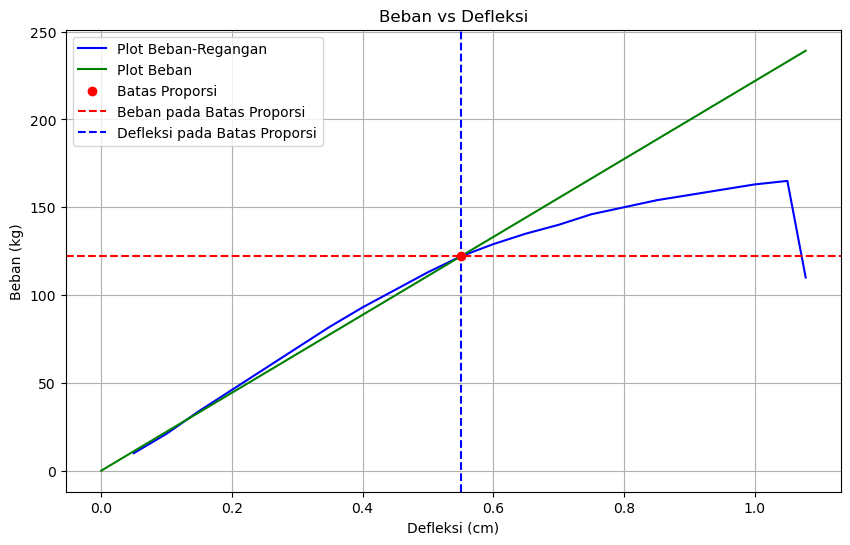

Beban pada Batas Proporsi: 122.00 kg
Defleksi pada Batas Proporsi: 0.55 cm
Beban Maksimum/pada Batas Patah: 165.00 kg
Tegangan pada Batas Proporsi: 583.43 kg/cm²
Modulus of Elasticity (MoE): 66638.50 kg/cm²
Modulus of Rupture (MoR): 789.06 kg/cm²


In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Data strain (defleksi/regangan) dan stress (beban)
strain_cm = np.array([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6,
                      0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1, 1.05, 1.078])
stress_kg = smoothened_stress_kg

# Dimensi sampel
L_cm = 28  # panjang bentangan sampel (cm)
b_cm = 2.03  # lebar sampel (cm)
d_cm = 2.08  # tebal sampel (cm)

# Batas proporsi (dengan asumsi bahwa kemiringannya linear)
def find_proportional_limit(strain, stress):
    # Hitung kemiringan plot beban
    slopes = np.diff(stress) / np.diff(strain)
    # Kemiringan plot beban dikoreksi dengan deviasi
    initial_slope = slopes[0]
    deviation_index = np.argmax(slopes < 0.8 * initial_slope)
    return strain[deviation_index], stress[deviation_index]

# Hitung MoE (Modulus of Elasticity) menggunakan deflesi (Δ), MoR (Modulus of Rupture), dan Tegangan pada Batas Proporsi 
def calculate_MoE_MoR_and_stress(strain, stress, proportional_limit_strain, proportional_limit_stress):
    # Defleksi (Δ) pada batas proporsi
    deflection_at_proportional_limit = proportional_limit_strain 
    
    # Modulus of Elasticity (MoE) (kg/cm²)
    MoE = (proportional_limit_stress * L_cm**3) / (4 * deflection_at_proportional_limit * b_cm * d_cm**3)

    # Modulus of Rupture (MoR) (kg/cm²)
    ultimate_stress = max(stress)
    MoR = (3 * ultimate_stress * L_cm) / (2 * b_cm * d_cm**2)  

    # Tegangan pada Batas Proporsi (kg/cm²)
    stress_at_proportional_limit = (3 * proportional_limit_stress * L_cm) / (2 * b_cm * d_cm**2)
    
    return MoE, MoR, stress_at_proportional_limit, ultimate_stress

# Hitung Batas Proporsi 
proportional_limit_strain, proportional_limit_stress = find_proportional_limit(strain_cm, stress_kg)

# Hitung MoE, MoR, Stress at Proportional Limit, dan Beban Maksimum
MoE, MoR, stress_at_proportional_limit, ultimate_stress = calculate_MoE_MoR_and_stress(
    strain_cm, stress_kg, proportional_limit_strain, proportional_limit_stress
)

# Membuat plot beban
load_line_x = np.linspace(0, max(strain_cm), 300)  # merapikan plot beban
load_line_y = (proportional_limit_stress / proportional_limit_strain) * load_line_x  # persamaan beban

# Membuat grafik Beban vs Defleksi
plt.figure(figsize=(10, 6))
plt.plot(strain_cm, stress_kg, label="Plot Beban-Regangan", color="blue")
plt.plot(load_line_x, load_line_y, label="Plot Beban", color="green")
plt.scatter([proportional_limit_strain], [proportional_limit_stress],
            color='red', label='Batas Proporsi', zorder=5)
plt.title("Beban vs Defleksi")
plt.xlabel("Defleksi (cm)")
plt.ylabel("Beban (kg)")
plt.axhline(proportional_limit_stress, color='red', linestyle='--', label='Beban pada Batas Proporsi')
plt.axvline(proportional_limit_strain, color='blue', linestyle='--', label='Defleksi pada Batas Proporsi')
plt.legend()
plt.grid(True)
plt.show()

# Hasil perhitungan
print(f"Beban pada Batas Proporsi: {proportional_limit_stress:.2f} kg")
print(f"Defleksi pada Batas Proporsi: {proportional_limit_strain:.2f} cm")
print(f"Beban Maksimum/pada Batas Patah: {ultimate_stress:.2f} kg")
print(f"Tegangan pada Batas Proporsi: {stress_at_proportional_limit:.2f} kg/cm²")
print(f"Modulus of Elasticity (MoE): {MoE:.2f} kg/cm²")
print(f"Modulus of Rupture (MoR): {MoR:.2f} kg/cm²")